In [3]:
import glob
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
from tqdm import tqdm
import multiprocessing as mp
import os
from build import build_model
import coralme

In [4]:
from IPython.display import display, HTML, Math, Markdown
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

In [5]:
# !bash report.sh
organisms = set(pandas.read_csv("biomass_constrained.txt",index_col=0,header=None).index.to_list())
done = {i.split(".csv")[0] for i in os.listdir("./cases/fluxes/low_zinc/")}

In [6]:
len(organisms)

495

### Load

In [7]:
def load_data(path):
    try:
        df = pandas.read_csv(path,index_col=0)[["fluxes"]]
    except:
        df = pandas.DataFrame(columns=["fluxes"])
    df.columns = [org]
    return df

In [8]:
from tqdm import tqdm
conditions = ["base"]

In [9]:
vals = []
for org in tqdm(organisms):
    for c in conditions:
        tmp = load_data("./cases/fluxes/{}/{}.csv".format(c,org))
        if tmp.empty:
            continue
        for i,val in tmp[tmp.index.str.contains("^transcription")].iterrows():
            if val[org] <= 0:
                continue
            vals.append(val[org])

100%|██████████| 495/495 [00:12<00:00, 38.98it/s]


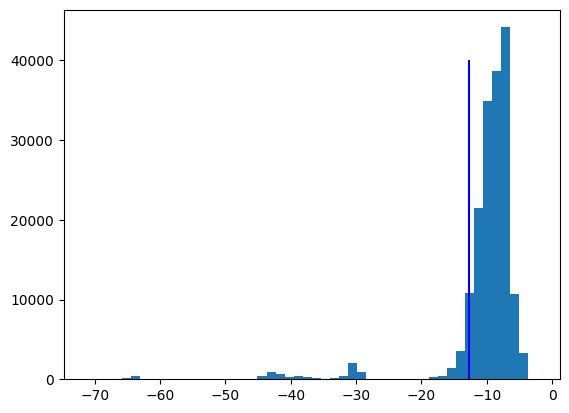

In [19]:
plt.hist(numpy.log10(vals),bins = 50)
l = 10
p = numpy.percentile(vals,l)
plt.vlines(x = numpy.log10(p), ymin = 0, ymax = 40000,color='b')

In [20]:
print("{}th percentile is {}".format(l,p))

10th percentile is 2.1917479162633475e-13
